# Автоматическая кластеризация

In [108]:
import time
from matplotlib import pyplot as plt
import pandas
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import datasets as dt

## Генерация данных

In [105]:
def nearby_set(n_clusters=10, mindots=60, maxdots=500, distance = 0.8):
    X_data = np.array([np.array([]), np.array([])]).T
    y_data = np.array([])
    for i in range(0, int(n_clusters**0.5)):
        for j in range(0, int(n_clusters**0.5)):
            count = np.random.randint(mindots, maxdots)
            X = np.array([np.random.ranf(count)*distance + i, np.random.ranf(count)*distance + j]).T
            y = np.array([int(n_clusters**0.5)*i+j]*count)
            X_data = np.concatenate((X_data, X))
            y_data = np.concatenate((y_data, y))
    for i in range(0, n_clusters - int(n_clusters**0.5)**2):
        count = np.random.randint(mindots, maxdots)
        X = np.array([np.random.ranf(count)*distance + int(n_clusters**0.5), np.random.ranf(count)*distance + i]).T
        y = np.array([int(n_clusters**0.5)**2+i]*count)
        X_data = np.concatenate((X_data, X))
        y_data = np.concatenate((y_data, y))
    return X_data, y_data


def included_set(n_clusters=10, mindots=30, maxdots=150, offset=0):
    X_data = np.array([np.array([]), np.array([])]).T
    y_data = np.array([])
    for i in range(1, n_clusters + 1):
        count = np.random.randint(mindots*i*i, maxdots*i*i)
        X = np.array([(np.random.ranf(count) - 0.5)*i, (np.random.ranf(count) - 0.5)*i]).T
        y = np.array([i-1]*count)
        Xy = np.concatenate((X, np.array([y]).T), axis = 1)
        Xy = Xy[(abs(X.T[0]) >= i/2 - 0.5 - offset) + (abs(X.T[1]) >= i/2 - 0.5 - offset)].T
        X = np.array([Xy[0], Xy[1]]).T
        y = Xy[2]
        X_data = np.concatenate((X_data, X))
        y_data = np.concatenate((y_data, y))
    return X_data, y_data

### Для начала рассмотрим простые данные

In [51]:
X, label = dt.make_blobs(n_samples = 400,
                         n_features=2,
                         centers=5,
                         random_state=20)

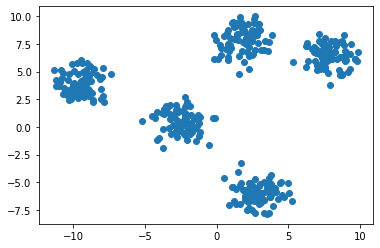

In [52]:
plt.scatter(X.T[0], X.T[1])
plt.show()

## Используем иерархическую кластеризацию для определения количества кластеров

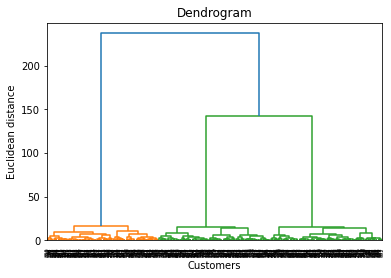

In [99]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 

dendrogram = dendrogram(linkage(X, method='ward', metric = 'euclidean'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [80]:
def hierarchical(data, t=10, depth=10):
    Z = linkage(data, 'ward')
    clusters = fcluster(Z, t=t, depth=depth)
    K = max(clusters) - min(clusters) + 1
#     for i in range(min(clusters), max(clusters) + 1):
#             plt.scatter(x=data.T[0][clusters == i], y=data.T[1][clusters == i])
#     plt.show()
    return K

In [81]:
k = hierarchical(X)

In [102]:
def predict_and_show(X, c_count):
    train_data, test_data = train_test_split(X, test_size=0.2)
    kmeans = KMeans(n_clusters = c_count, init = 'k-means++')
    kmeans.fit(train_data)
    y = kmeans.predict(test_data)
    for i in range(c_count):
        plt.scatter(test_data[y == i, 0], test_data[y == i, 1], s = 50, label = f'Cluster {i+1}') # c = colors[i]
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centeroids of clusters')
    plt.show()

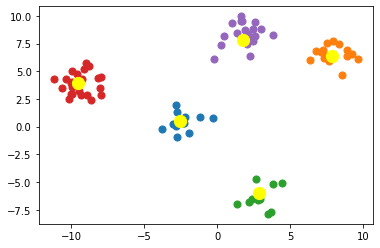

In [92]:
predict_and_show(X, k)

## Генерируем еще один датасет

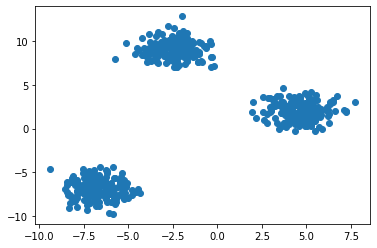

In [96]:
X, label = dt.make_blobs(n_samples = 600,
                  n_features = 2,
                 centers = 3,
                    random_state = 42)
plt.scatter(X.T[0], X.T[1])
plt.show()

In [100]:
k = hierarchical(X)

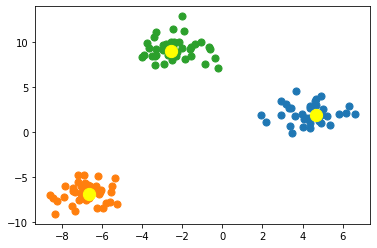

In [106]:
predict_and_show(X, k)

## Проведем тест с вложенными данными

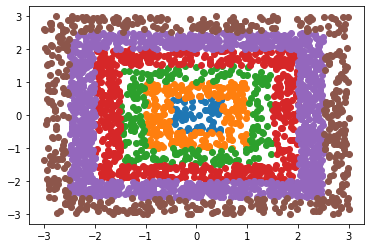

In [112]:
X, y = included_set(n_clusters=6)
for i in range (0, 6):
    plt.scatter(x = X[y == i].T[0], y = X[y == i].T[1])
plt.show()

In [113]:
k = hierarchical(X)

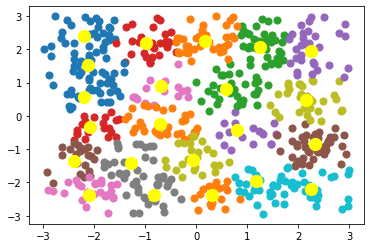

In [114]:
predict_and_show(X, k)

По графику мы отчетливо видим, что иерархическая кластеризация не правильно определяет кластеры. Из-за чего впоследствии k-means выдает неверные результаты

## Отчет:

Как мы видим функция работает корректно с невложенными данными. С помощью алгоритма иерархической сортировки мы определяем количество кластеров. Благодаря функции fcluster нам удается определить количество кластеров для произвольного набора данных. А обладая таким знанием, мы легко можем построить кластеризатор на основе алгоритма K-means.